In [1]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy 
import pandas as pd
import missingno as msno
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px

from dash import dcc
from dash import html
from jupyter_dash import JupyterDash

# #Data1

In [3]:
interesting_cols1=['iso_code','location','date','total_cases','stringency_index','population','gdp_per_capita','human_development_index']

df=pd.read_excel('data.xlsx', usecols=interesting_cols1)

In [4]:
df['date']

0        2019-12-31
1        2020-01-01
2        2020-01-02
3        2020-01-03
4        2020-01-04
            ...    
50413    2020-10-15
50414    2020-10-16
50415    2020-10-17
50416    2020-10-18
50417    2020-10-19
Name: date, Length: 50418, dtype: object

In [5]:
df2 = df.groupby(by='iso_code').std()
df2

,total_cases,stringency_index,population,gdp_per_capita,human_development_index
iso_code,,,,,
ABW,1466.396722,19.729263,0.0,0.0,NaN
AFG,17246.787050,33.418461,0.0,0.0,0.0
AGO,1935.163957,10.050075,0.0,0.0,0.0
AIA,0.181195,19.851507,0.0,NaN,NaN
ALB,4996.860554,15.736142,0.0,0.0,0.0
...,...,...,...,...,...
VNM,384.475775,23.679812,0.0,0.0,0.0
YEM,806.605927,11.943920,0.0,0.0,0.0
ZAF,283243.987465,27.969034,0.0,0.0,0.0


In [6]:
#missimg values
missing_value = df.isnull().sum().sort_values(ascending = False) / df.shape[0]
missing_value

stringency_index           0.141338
human_development_index    0.123012
gdp_per_capita             0.113293
total_cases                0.061367
iso_code                   0.000000
location                   0.000000
date                       0.000000
population                 0.000000
dtype: float64

In [7]:

#df["stringency_index"].unique()
#display(df[df["stringency_index"].isnull()])


# Nan

In [8]:
#remplacer les valeurs nan par ceux qui ont le mm date et isocode  
df["stringency_index"] = df.groupby("date" and "iso_code")["stringency_index"].apply(lambda x: x.ffill().bfill())

In [9]:
missing_value = df.isnull().sum().sort_values(ascending = False) / df.shape[0]
missing_value

human_development_index    0.123012
stringency_index           0.115157
gdp_per_capita             0.113293
total_cases                0.061367
iso_code                   0.000000
location                   0.000000
date                       0.000000
population                 0.000000
dtype: float64

<AxesSubplot:ylabel='Frequency'>

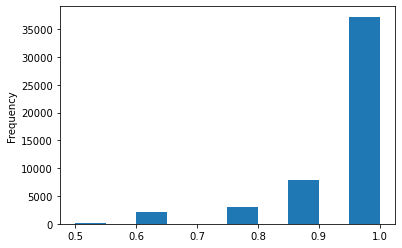

In [10]:
#taux de remplissage
data=df.assign(taux_remplissage=list(df.notnull().sum(axis=1) / df.shape[1]))
data.taux_remplissage.sort_values().plot(kind="hist")

In [11]:
data

,iso_code,location,date,total_cases,stringency_index,population,gdp_per_capita,human_development_index,taux_remplissage
0,AFG,Afghanistan,2019-12-31,0.0,0.00,38928341,1803.987,0.498,1.0
1,AFG,Afghanistan,2020-01-01,0.0,0.00,38928341,1803.987,0.498,1.0
2,AFG,Afghanistan,2020-01-02,0.0,0.00,38928341,1803.987,0.498,1.0
3,AFG,Afghanistan,2020-01-03,0.0,0.00,38928341,1803.987,0.498,1.0
4,AFG,Afghanistan,2020-01-04,0.0,0.00,38928341,1803.987,0.498,1.0
...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055.0,76.85,14862927,1899.775,0.535,1.0
50414,ZWE,Zimbabwe,2020-10-16,8075.0,76.85,14862927,1899.775,0.535,1.0
50415,ZWE,Zimbabwe,2020-10-17,8099.0,76.85,14862927,1899.775,0.535,1.0
50416,ZWE,Zimbabwe,2020-10-18,8110.0,76.85,14862927,1899.775,0.535,1.0


In [12]:
data =data[data.taux_remplissage > 0.58]


In [13]:
data.drop(columns = ["taux_remplissage"], inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

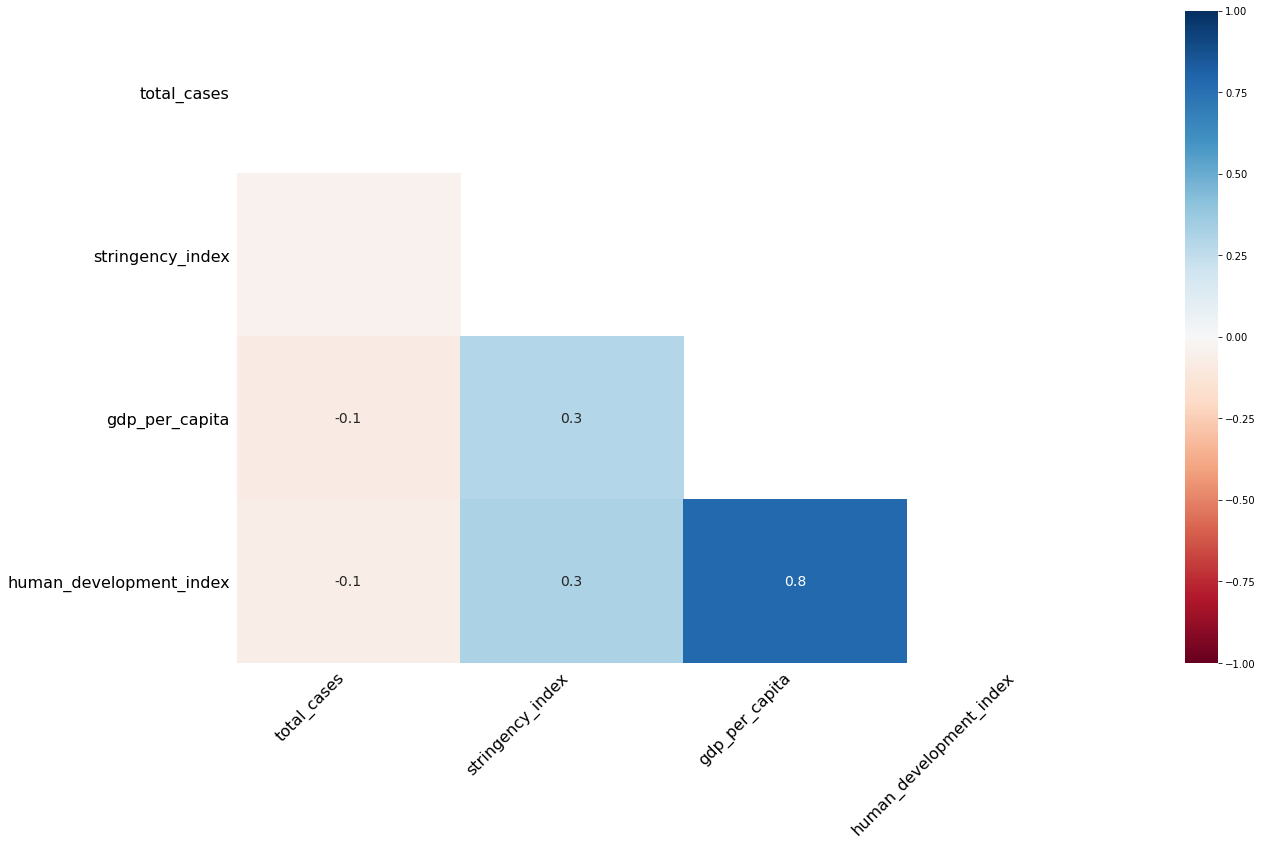

In [14]:
# analyse de correlation entre les valeurs manquantes
msno.heatmap(data)

# l'interpolation

<AxesSubplot:>

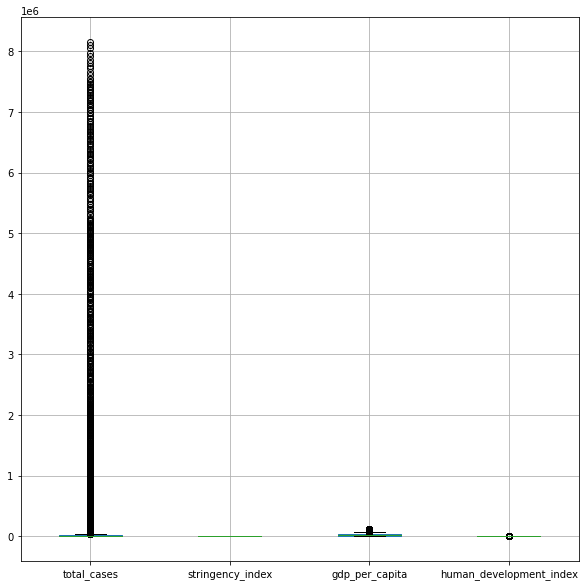

In [15]:
plt.figure(figsize=(10,10))
data.boxplot(column=['total_cases','stringency_index','gdp_per_capita','human_development_index']) 

In [16]:
data.interpolate(method ='linear', limit_direction ='backward', inplace=True)

<ipython-input-16-9b7feb4941c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.interpolate(method ='linear', limit_direction ='backward', inplace=True)


In [17]:
data.isnull().sum()/data.shape[0]

iso_code                   0.0
location                   0.0
date                       0.0
total_cases                0.0
stringency_index           0.0
population                 0.0
gdp_per_capita             0.0
human_development_index    0.0
dtype: float64

In [18]:
data


,iso_code,location,date,total_cases,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.00,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.00,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.00,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.00,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.00,38928341,1803.987,0.498
...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055.0,76.85,14862927,1899.775,0.535
50414,ZWE,Zimbabwe,2020-10-16,8075.0,76.85,14862927,1899.775,0.535
50415,ZWE,Zimbabwe,2020-10-17,8099.0,76.85,14862927,1899.775,0.535
50416,ZWE,Zimbabwe,2020-10-18,8110.0,76.85,14862927,1899.775,0.535


In [19]:
# verify
data.isnull().values.any()

False

# #Data 2

In [20]:
#interesting_cols2=['iso_code','continent','date','location','total_cases','stringency_index','population','gdp_per_capita','human_development_index']
data2=pd.read_excel('owid-covid-data.xlsx')

In [21]:
interesting_cols2=['iso_code','continent','date','location','total_cases','stringency_index','population','gdp_per_capita','human_development_index']
data = data2[interesting_cols2]

## Analyse des valeurs manquantes


In [22]:
# pourcentage des valeurs manquantes pour chaque colonne
missing_value_parcentage_per_column = data.isnull().sum()/data.shape[0]
missing_value_parcentage_per_column.sort_values()

iso_code                   0.000000
date                       0.000000
location                   0.000000
population                 0.005805
total_cases                0.041010
continent                  0.057454
gdp_per_capita             0.180924
human_development_index    0.200443
stringency_index           0.246358
dtype: float64

In [23]:
# pourcentage des valeurs manquantes pour toute la DataFrame
missing_value_parcentage_per_Data = data.isnull().sum().sum()/data.size
missing_value_parcentage_per_Data

0.08133267981474342

In [24]:
data.shape

(223066, 9)

In [25]:
# Analyse des valeurs manquantes par colonnes
missing_value = data.isnull().sum().sort_values(ascending = False) / data.shape[0]
missing_value


stringency_index           0.246358
human_development_index    0.200443
gdp_per_capita             0.180924
continent                  0.057454
total_cases                0.041010
population                 0.005805
iso_code                   0.000000
date                       0.000000
location                   0.000000
dtype: float64

<BarContainer object of 9 artists>

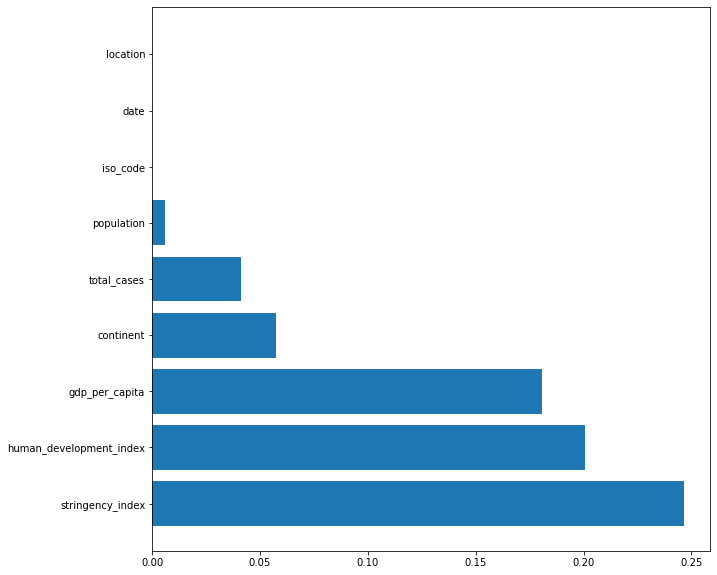

In [26]:
plt.figure(figsize=(10,10))
plt.barh(missing_value.index, missing_value.values)

# Suppression des lignes ayant tropde valeurs manquantes

<AxesSubplot:>

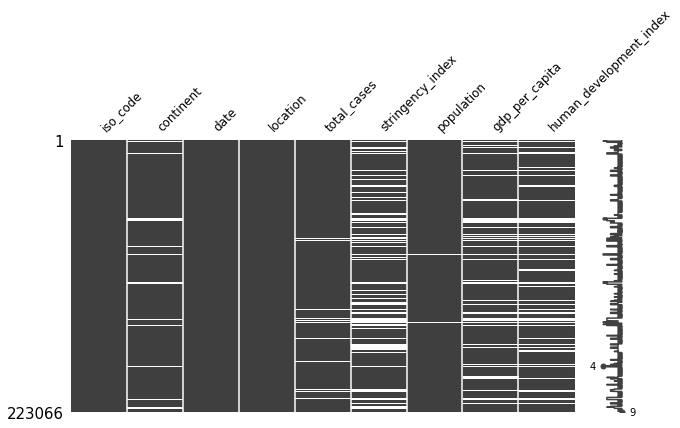

In [27]:
msno.matrix(data,figsize=(10,5), fontsize=12) 

#### Taux de remplissage :
C'est pour mesurer le taux de remplissage de chaque ligne de notre DataFrame

<AxesSubplot:ylabel='Frequency'>

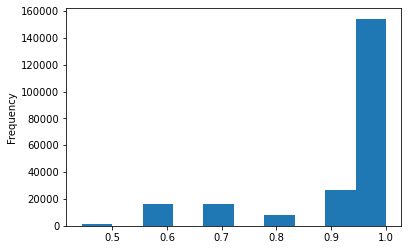

In [28]:
new_data=data.assign(taux_remplissage=list(data.notnull().sum(axis=1) / data.shape[1]))
new_data.taux_remplissage.sort_values().plot(kind="hist")

In [29]:
new_data = new_data[new_data.taux_remplissage > 0.5]
new_data.drop(columns = ["taux_remplissage"], inplace = True)

#### analyse de correlation entre les valeurs manquantes

<AxesSubplot:>

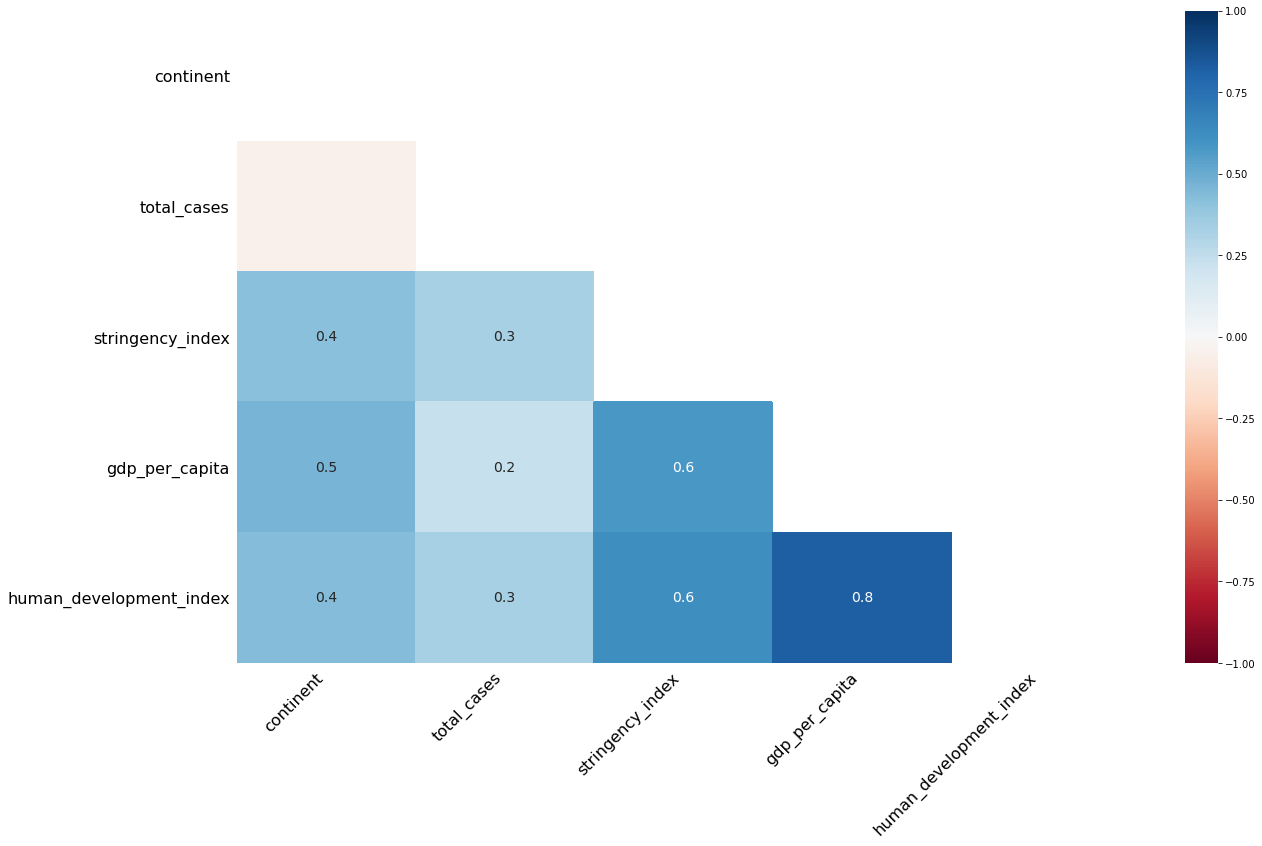

In [30]:
# Pour voir les correlations existantes entre nos différents colonnes
msno.heatmap(new_data)

#### Nettoyage problématique et statistiques


<AxesSubplot:>

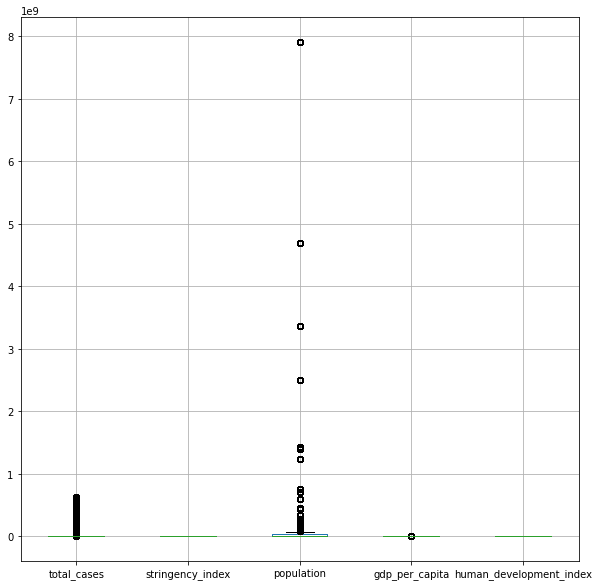

In [31]:
plt.figure(figsize=(10,10))
new_data.boxplot(column=['total_cases','stringency_index','population','gdp_per_capita','human_development_index']) 

#### On remarque qu'il existe des valeurs abérantes très importantes  pour la colonne population

In [32]:
# Une autre remarque 
max(new_data.population)

7909295152.0

## Data Cleaning

In [33]:
# Pour supprimer les outliers
def remove_outliers(col,df):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df.query(f"{col} >= {q1-1.5*iqr} and {col} <= {q3 + 1.5*iqr}")

In [34]:
# Pour supprimer les outliers liés à la colonne population
#remove_outliers(population,new_data)

In [35]:
new_data.isnull().sum()/new_data.shape[0]

iso_code                   0.000000
continent                  0.053350
date                       0.000000
location                   0.000000
total_cases                0.039790
stringency_index           0.241933
population                 0.000000
gdp_per_capita             0.176115
human_development_index    0.195749
dtype: float64

### Pour la colonne continent
update_df : est la base de donnée finale par rapport au nettoyage de la colonne Continent

In [36]:
new_data.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [37]:
new_data.iso_code.unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GGY', 'GIN',
       'GNB', 'GUY', 'HTI', 'OWID_HIC', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN',
       'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'OWID_LIC',

In [38]:
dictionnaire = {}
for country in new_data.iso_code.unique():
    dictionnaire[country] = new_data[new_data['iso_code'] == country]['continent'].reset_index().iloc[0,1]

In [39]:
DataFrame_continent = pd.DataFrame(list(dictionnaire.items()),
                   columns=['iso_code', 'continent'])
DataFrame_continent


,iso_code,continent
0,AFG,Asia
1,OWID_AFR,NaN
2,ALB,Europe
3,DZA,Africa
4,AND,Europe
...,...,...
237,ESH,Africa
238,OWID_WRL,NaN
239,YEM,Asia
240,ZMB,Africa


In [40]:
new_data

,iso_code,continent,date,location,total_cases,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Asia,2020-02-24,Afghanistan,5.0,8.33,40099462.0,1803.987,0.511
1,AFG,Asia,2020-02-25,Afghanistan,5.0,8.33,40099462.0,1803.987,0.511
2,AFG,Asia,2020-02-26,Afghanistan,5.0,8.33,40099462.0,1803.987,0.511
3,AFG,Asia,2020-02-27,Afghanistan,5.0,8.33,40099462.0,1803.987,0.511
4,AFG,Asia,2020-02-28,Afghanistan,5.0,8.33,40099462.0,1803.987,0.511
...,...,...,...,...,...,...,...,...,...
223061,ZWE,Africa,2022-10-07,Zimbabwe,257655.0,NaN,15993524.0,1899.775,0.571
223062,ZWE,Africa,2022-10-08,Zimbabwe,257655.0,NaN,15993524.0,1899.775,0.571
223063,ZWE,Africa,2022-10-09,Zimbabwe,257655.0,NaN,15993524.0,1899.775,0.571
223064,ZWE,Africa,2022-10-10,Zimbabwe,257749.0,NaN,15993524.0,1899.775,0.571


In [41]:
L=[]
new_data.drop(['continent'], axis=1)
for e in new_data.iso_code:
    L.append(list(DataFrame_continent[DataFrame_continent['iso_code'] == e]['continent'])[0])
new_data['continent'] = L  

In [42]:
# Pour les pays non reconnu du tout 
indexes_to_be_dropped = new_data[new_data['continent'].isnull()==True].index
update_df = new_data.drop(list(indexes_to_be_dropped))


In [43]:
update_df.isnull().sum()/update_df.shape[0]

iso_code                   0.000000
continent                  0.000000
date                       0.000000
location                   0.000000
total_cases                0.042032
stringency_index           0.199211
population                 0.000000
gdp_per_capita             0.134419
human_development_index    0.155159
dtype: float64

In [44]:
data_test = update_df.copy()

In [45]:
### Pour les colonnes total_cases, stringency_index, gdp, human_; utilisons l'interpolation pour remplir les valeurs manquantes
data_test.interpolate(method ='linear', limit_direction ='backward', inplace=True)

In [46]:
data_test.interpolate(method ='linear', limit_direction ='backward', inplace=True)
data_test.isnull().sum()/data_test.shape[0]

iso_code                   0.000000
continent                  0.000000
date                       0.000000
location                   0.000000
total_cases                0.000000
stringency_index           0.000043
population                 0.000000
gdp_per_capita             0.000000
human_development_index    0.000000
dtype: float64

# merge data

In [47]:
data_merged=pd.merge(data_test ,data, how="outer", on=['iso_code','date', 'location'])
print(data_merged.head(10))

  iso_code continent_x        date     location  total_cases_x  \
0      AFG        Asia  2020-02-24  Afghanistan            5.0   
1      AFG        Asia  2020-02-25  Afghanistan            5.0   
2      AFG        Asia  2020-02-26  Afghanistan            5.0   
3      AFG        Asia  2020-02-27  Afghanistan            5.0   
4      AFG        Asia  2020-02-28  Afghanistan            5.0   
5      AFG        Asia  2020-02-29  Afghanistan            5.0   
6      AFG        Asia  2020-03-01  Afghanistan            5.0   
7      AFG        Asia  2020-03-02  Afghanistan            5.0   
8      AFG        Asia  2020-03-03  Afghanistan            5.0   
9      AFG        Asia  2020-03-04  Afghanistan            5.0   

   stringency_index_x  population_x  gdp_per_capita_x  \
0                8.33    40099462.0          1803.987   
1                8.33    40099462.0          1803.987   
2                8.33    40099462.0          1803.987   
3                8.33    40099462.0          

In [48]:
#merging total_cases columns from data1 and data2 by calculating mean
#removing initial columns
data_merged['total_cases_mean']=data_merged[['total_cases_x','total_cases_y']].mean(axis = 1)
data_merged.drop(['total_cases_x','total_cases_y'],axis=1, inplace=True)

In [49]:
#same with sti
data_merged['stringency_index_mean']=data_merged[['stringency_index_x','stringency_index_y']].mean(axis = 1)
data_merged.drop(['stringency_index_x','stringency_index_y'],axis=1, inplace=True)

In [50]:
# same with gdp

data_merged['gdp_per_capita_mean']=data_merged[['gdp_per_capita_x','gdp_per_capita_y']].mean(axis = 1)
data_merged.drop(['gdp_per_capita_x','gdp_per_capita_y'],axis=1, inplace=True)

In [51]:
# same with pop

data_merged['population_mean']=data_merged[['population_x','population_y']].mean(axis = 1)
data_merged.drop(['population_x','population_y'],axis=1, inplace=True)

In [52]:
# same with HDI

data_merged['human_development_index_mean']=data_merged[['human_development_index_x','human_development_index_y']].mean(axis = 1)
data_merged.drop(['human_development_index_x','human_development_index_y'],axis=1, inplace=True)

In [53]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn
import plotly

seaborn.set_context('talk')


In [54]:
simple_data_gdp=data_merged[['date','gdp_per_capita_mean']].copy()
simple_data_sti=data_merged[['date','stringency_index_mean']].copy()
simple_data_total_cases=data_merged[['date','total_cases_mean']].copy()

distinct=simple_data_gdp.date.unique()
simple_data=pd.DataFrame(index=distinct)
# simple_data['date']=distinct
simple_data['gdp']=simple_data_gdp.groupby(['date']).mean()
simple_data['sti']=simple_data_sti.groupby(['date']).mean()
simple_data['total_cases']=simple_data_total_cases.groupby(['date']).mean()

simple_data.sort_index(inplace=True)

In [55]:
simple_data.reset_index()

,index,gdp,sti,total_cases
0,2020-01-01,18135.188000,2.239887,1.338350e+05
1,2020-01-02,18135.188000,2.133226,1.315325e+05
2,2020-01-03,18135.188000,2.026565,1.292300e+05
3,2020-01-04,17516.015667,3.279136,9.709618e+04
4,2020-01-05,17516.015667,3.096961,9.486804e+04
...,...,...,...,...
1010,2022-10-07,18994.131982,20.405260,1.148579e+07
1011,2022-10-08,18994.326897,20.310887,1.148984e+07
1012,2022-10-09,18994.521812,20.216515,1.149383e+07
1013,2022-10-10,18994.716727,20.122143,1.150396e+07


In [56]:
date = list(simple_data['gdp'].index)

# Partie : Machine Learning
Le but de cette partie est de prédire en quelque sorte comment varie le PIB(Produit Intérieur Brut) en fonction de la situation Covid 19, liée principalement aux deux features suivants;
total_cases: nombre total de cas covid-positif
sti: stringency_index

### Normalisation : StandardScaler

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
data_stdscl = StandardScaler().fit_transform(simple_data)

In [59]:
df = pd.DataFrame(data_stdscl, columns = ['gdp', 'sti', 'total_cases'])

In [60]:
df['date'] = date

In [61]:
df

,gdp,sti,total_cases,date
0,-0.657625,-2.685587,-1.111672,2020-01-01
1,-0.657625,-2.692955,-1.112320,2020-01-02
2,-0.657625,-2.700323,-1.112967,2020-01-03
3,-0.884133,-2.613800,-1.122002,2020-01-04
4,-0.884133,-2.626384,-1.122628,2020-01-05
...,...,...,...,...
1010,-0.343403,-1.430787,2.080065,2022-10-07
1011,-0.343332,-1.437306,2.081206,2022-10-08
1012,-0.343261,-1.443824,2.082328,2022-10-09
1013,-0.343190,-1.450343,2.085176,2022-10-10


## Modèle Machine Learning

## Récupération des données

In [62]:
X = df[['sti','total_cases']]
y = df['gdp']

In [63]:
X = df[['sti','total_cases']].values.tolist()
y = df['gdp'].values.tolist()

In [64]:
X = numpy.array(X)
y = numpy.array(y)

## Train and Test split : Diviser notre DataSet en deux parties (TraiSet, TestSet)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (812, 2)
Test set: (203, 2)


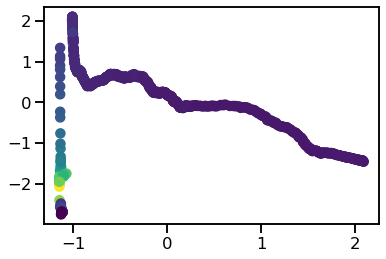

In [67]:
plt.scatter(X_train[:,1],X_train[:,0], c = y_train)

In [68]:
from sklearn.svm import SVR

In [69]:
model = SVR(C=1.0, epsilon=0.2)

In [70]:
model.fit(X_train, y_train)

SVR(epsilon=0.2)

In [71]:
y_pred = model.predict(X_test)

### Model Score

In [72]:
model.score(X_test,y_test)

0.8644072943461523

In [75]:
y_test.shape

(203,)

In [76]:
y_pred.shape

(203,)

### GridSearch : Pour trouver les paramètres optimales de notre modèle

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},
grids = GridSearchCV(SVR(),param,cv=4)

In [82]:
grids.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SVR(),
             param_grid=({'coef0': [0.01, 10, 0.5], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},))

In [84]:
grids.score(X_test, y_test)

0.878704633630403